### Sobre o Projeto

Neste notebook vamos realizar algumas atividades envolvendo regressão linear. Iremos analisar os dados de alguns hoteis e utilizar as informações para desenvolver um modelo de precificação.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/hoteis.csv')

In [ ]:
dados.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


## Análise inicial com pairplot

### Subtask:
Vamos Gerar um PairPlot usando a biblioteca Seaborn para visualizar as relações entre as variáveis do conjunto de dados.


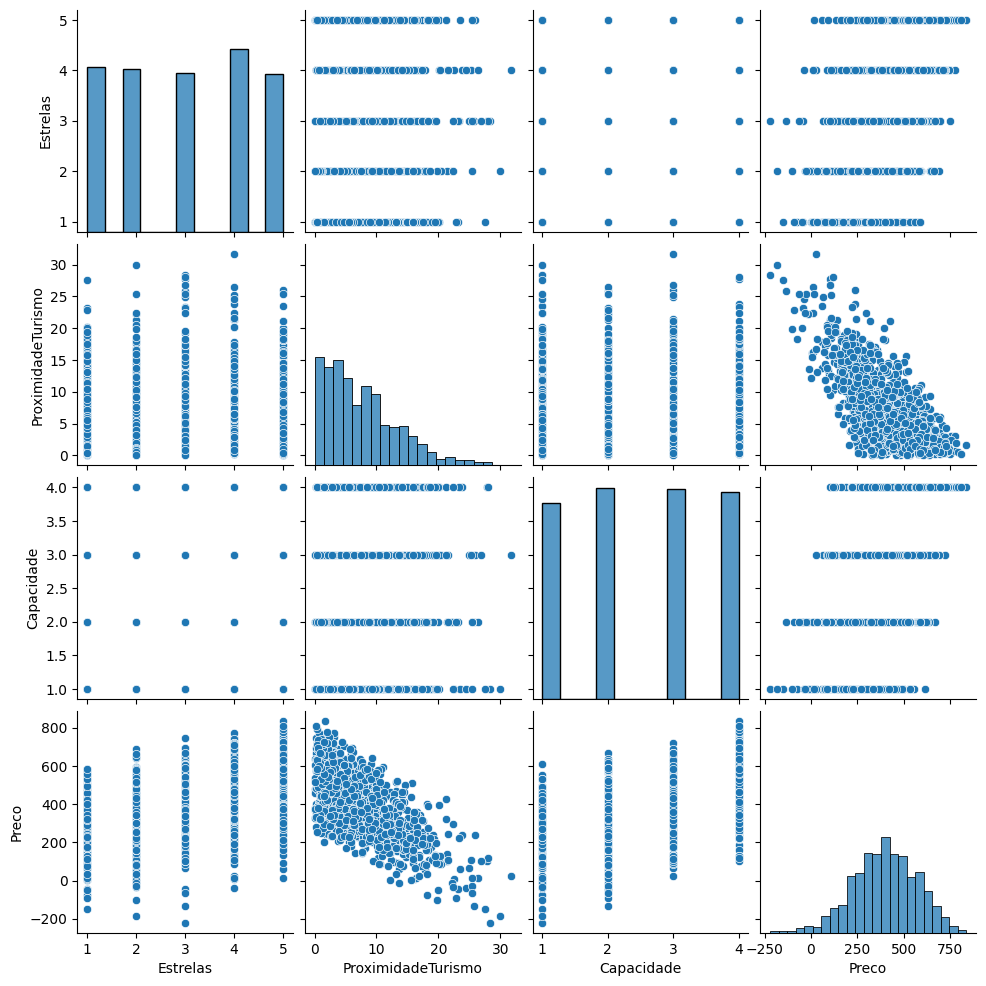

In [ ]:
import seaborn as sns

sns.pairplot(dados)

## Preparação dos dados para modelagem

### Subtask:
Separarando os dados em variáveis independentes (features) e a variável dependente (target), e dividindo o conjunto de dados em treino e teste.


In [ ]:
X = dados[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
y = dados['Preco']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Construção do primeiro modelo de regressão linear

### Subtask:
Agora iremos construir um modelo de regressão linear simples utilizando uma única feature e treinar o modelo com os dados de treino.


In [ ]:
from sklearn.linear_model import LinearRegression

X_train_simple = X_train[['Estrelas']]

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

LinearRegression()

## Avaliação do primeiro modelo

### Subtask:
Nessa etapa vamos avaliar o desempenho do primeiro modelo utilizando métricas apropriadas (por exemplo, R-squared, Mean Absolute Error, Mean Squared Error) nos dados de teste.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_test_simple = X_test[['Estrelas']]
y_pred_simple = model_simple.predict(X_test_simple)

In [ ]:
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)

print(f'Simple Linear Regression Model Performance:')
print(f'R-squared: {r2_simple:.4f}')
print(f'Mean Absolute Error (MAE): {mae_simple:.4f}')
print(f'Mean Squared Error (MSE): {mse_simple:.4f}')

Simple Linear Regression Model Performance:
R-squared: 0.1157
Mean Absolute Error (MAE): 127.0911
Mean Squared Error (MSE): 25700.9883


## Construção do segundo modelo de regressão linear

### Subtask:
Iremos construir um modelo de regressão linear múltipla utilizando múltiplas features e treinar o modelo com os dados de treino.


In [ ]:
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

## Avaliação do segundo modelo

### Subtask:
Avaliar o desempenho do segundo modelo utilizando as mesmas métricas do primeiro modelo nos dados de teste.


In [ ]:
y_pred_multiple = model_multiple.predict(X_test)

r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

print(f'Multiple Linear Regression Model Performance:')
print(f'R-squared: {r2_multiple:.4f}')
print(f'Mean Absolute Error (MAE): {mae_multiple:.4f}')
print(f'Mean Squared Error (MSE): {mse_multiple:.4f}')

Multiple Linear Regression Model Performance:
R-squared: 0.9213
Mean Absolute Error (MAE): 39.3414
Mean Squared Error (MSE): 2288.7119


## Comparação dos modelos

### Subtask:
Comparar os resultados das avaliações dos dois modelos para determinar qual apresenta o melhor desempenho na precificação de quartos de hotéis.


In [ ]:
print("Comparação do Desempenho dos Modelos:")
print("-" * 40)

print(f'Modelo de Regressão Linear Simples:')
print(f'  R-squared: {r2_simple:.4f}')
print(f'  Mean Absolute Error (MAE): {mae_simple:.4f}')
print(f'  Mean Squared Error (MSE): {mse_simple:.4f}')
print("-" * 40)

print(f'Modelo de Regressão Linear Múltipla:')
print(f'  R-squared: {r2_multiple:.4f}')
print(f'  Mean Absolute Error (MAE): {mae_multiple:.4f}')
print(f'  Mean Squared Error (MSE): {mse_multiple:.4f}')
print("-" * 40)

if r2_multiple > r2_simple:
    print("O Modelo de Regressão Linear Múltipla apresentou melhor desempenho (maior R-squared).")
elif r2_simple > r2_multiple:
    print("O Modelo de Regressão Linear Simples apresentou melhor desempenho (maior R-squared).")
else:
    print("Ambos os modelos apresentaram desempenho similar (R-squared).")

if mae_multiple < mae_simple:
    print("O Modelo de Regressão Linear Múltipla apresentou melhor desempenho (menor MAE).")
elif mae_simple < mae_multiple:
    print("O Modelo de Regressão Linear Simples apresentou melhor desempenho (menor MAE).")
else:
    print("Ambos os modelos apresentaram desempenho similar (MAE).")

if mse_multiple < mse_simple:
    print("O Modelo de Regressão Linear Múltipla apresentou melhor desempenho (menor MSE).")
elif mse_simple < mse_multiple:
    print("O Modelo de Regressão Linear Simples apresentou melhor desempenho (menor MSE).")
else:
    print("Ambos os modelos apresentaram desempenho similar (MSE).")

Comparação do Desempenho dos Modelos:
----------------------------------------
Modelo de Regressão Linear Simples:
  R-squared: 0.1157
  Mean Absolute Error (MAE): 127.0911
  Mean Squared Error (MSE): 25700.9883
----------------------------------------
Modelo de Regressão Linear Múltipla:
  R-squared: 0.9213
  Mean Absolute Error (MAE): 39.3414
  Mean Squared Error (MSE): 2288.7119
----------------------------------------
O Modelo de Regressão Linear Múltipla apresentou melhor desempenho (maior R-squared).
O Modelo de Regressão Linear Múltipla apresentou melhor desempenho (menor MAE).
O Modelo de Regressão Linear Múltipla apresentou melhor desempenho (menor MSE).


## Resumo

### Principais Descobertas da Análise de Dados:

*   O modelo de regressão linear simples, utilizando apenas 'Estrelas' como preditor, apresentou um R-quadrado baixo de aproximadamente 0,1157 e métricas de erro elevadas (MAE: $127,09, MSE: $$127,09, MSE: $25700,99) nos dados de teste.
*   O modelo de regressão linear múltipla, utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade', alcançou um R-quadrado significativamente maior de aproximadamente 0,9213 e métricas de erro muito menores (MAE: $39,34, MSE: $$39,34, MSE: $2288,71) nos dados de teste.
*   Comparando os modelos, o modelo de regressão linear múltipla demonstrou desempenho superior em todas as métricas avaliadas (R-quadrado, MAE e MSE) em comparação com o modelo de regressão linear simples.

### Insights ou Próximos Passos

*  A inclusão de características adicionais como 'ProximidadeTurismo' e 'Capacidade' melhorou significativamente a capacidade do modelo de prever os preços dos quartos de hotel.
*  Análises futuras podem envolver a exploração de relacionamentos não lineares, engenharia de características ou a tentativa de outros algoritmos de regressão para potencialmente melhorar ainda mais a precisão da previsão.


## Multicolinearidade e Homocedasticidade

Vamos aplicar agora os conceitos de multicolinearidade e homocedasticidade em um contexto diferente: o setor de energia. Utilizaremos o dataset de uma usina de energia para explorar como esses conceitos podem afetar os nossos modelos de regressão.

In [ ]:
import pandas as pd

In [ ]:
dados_usina = pd.read_csv('/content/usina.csv')

In [ ]:
dados_usina.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
dados_usina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Objetivo
Analisaremos o dataset "dados_usina" para verificar multicolinearidade utilizando VIF e construir um modelo de regressão linear com 'PE' como variável dependente. Em seguida, realizaremos uma análise de resíduos para identificar heterocedasticidade. Iremos apresentar as conclusões e possíveis medidas a serem tomadas.

## Verificar multicolinearidade (vif)

### Subtask:
Iremos calcular o Fator de Inflação da Variância (VIF) para as variáveis independentes do dataset `dados_usina` para identificar multicolinearidade.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_usina = dados_usina[['AT', 'V', 'AP', 'RH']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_usina.columns
vif_data["VIF"] = [variance_inflation_factor(X_usina.values, i) for i in range(X_usina.shape[1])]

print("Variance Inflation Factor (VIF) for features in dados_usina:")
print(vif_data)

Variance Inflation Factor (VIF) for features in dados_usina:
  feature        VIF
0      AT  39.157705
1       V  74.969127
2      AP  66.618618
3      RH  40.704756


## Construir modelo de regressão linear

### Subtask:
Construindo um modelo de regressão linear utilizando `statsmodels` com 'PE' como variável dependente e as outras colunas como variáveis independentes.


In [ ]:
import statsmodels.formula.api as smf

formula = 'PE ~ AT + V + AP + RH'

model_usina = smf.ols(formula, data=dados_usina).fit()

print(model_usina.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 14 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:40:58   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

## Análise de resíduos

### Subtask:
Nessa etapa iremos calcular os resíduos do modelo e criar um gráfico de dispersão dos resíduos em relação aos valores preditos para identificar heterocedasticidade.


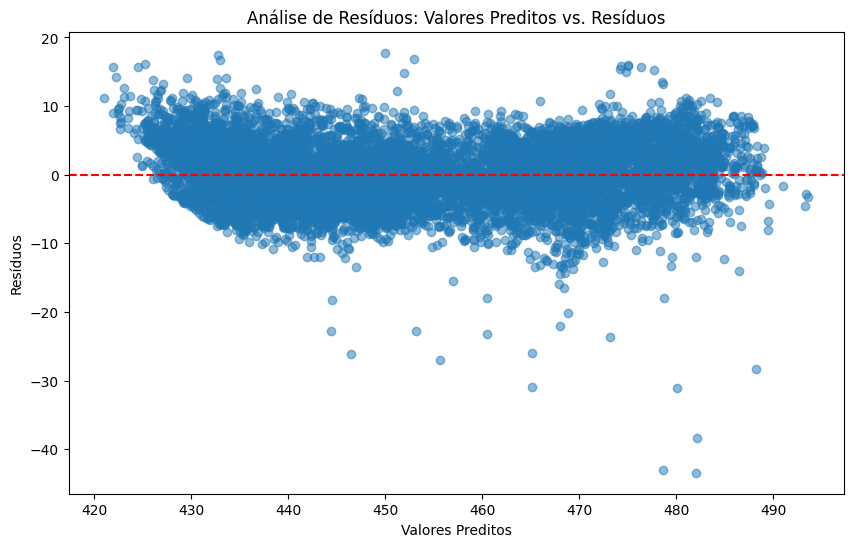

In [ ]:
import matplotlib.pyplot as plt

y_pred_usina = model_usina.predict(X_usina)

residuals_usina = dados_usina['PE'] - y_pred_usina

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_usina, residuals_usina, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")

plt.title("Análise de Resíduos: Valores Preditos vs. Resíduos")

plt.show()

## Resumo:

### Principais Descobertas da Análise de Dados

*   Os valores do Fator de Inflação da Variância (VIF) para as variáveis independentes são significativamente altos: 'AT' (39,16), 'V' (74,97), 'AP' (66,62) e 'RH' (40,70). Isso indica fortemente a presença de multicolinearidade entre os preditores.
*   O resumo do modelo de regressão linear mostra um alto valor de R-quadrado (0,929), sugerindo que as variáveis independentes explicam uma grande proporção da variância em 'PE'.
*   O resumo do modelo inclui um aviso sobre um grande número de condição (2.13e+05), o que reforça ainda mais a presença de multicolinearidade.
*   A inspeção visual do gráfico de dispersão dos resíduos versus valores preditos revela um padrão não aleatório, com a dispersão dos resíduos mudando à medida que os valores preditos aumentam. Isso sugere a presença de heterocedasticidade.

### Insights ou Próximos Passos

*  Podemos abordar a multicolinearidade considerando técnicas como remover variáveis altamente correlacionadas, combinar variáveis ou usar métodos de regularização antes de reajustar o modelo de regressão linear.
*   Investigar métodos para lidar com a heterocedasticidade, como transformar a variável dependente, usar regressão por mínimos quadrados ponderados ou empregar erros padrão robustos, para garantir a validade das inferências estatísticas do modelo.
